In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
import random

In [2]:
Mild_demented=[]
for i in tqdm(range(1,897)):
    filename= f"Desktop/Dataset/Mild_Demented/mild_{i}.jpg"
    img= Image.open(filename)
    #nouvelle_largeur= img.width // 4
    #nouvelle_hauteur= img.height // 4
    #img_redim= img.resize((nouvelle_largeur, nouvelle_hauteur))
    tableau_pixels= np.asarray(img)
    Mild_demented.append(tableau_pixels.tolist())

100%|████████████████████████████████████████| 896/896 [00:02<00:00, 385.85it/s]


In [3]:
Mild_demented= np.array(Mild_demented)

In [4]:
Mild_demented.shape #image de taille 128 fois 128 pixels

(896, 128, 128)

In [5]:
Non_demented=[]
for i in tqdm(range(1,3201)):
    filename= f"Desktop/Dataset/Non_Demented/non_{i}.jpg"
    img= Image.open(filename)
    #nouvelle_largeur= img.width // 4
    #nouvelle_hauteur= img.height // 4
    #img_redim= img.resize((nouvelle_largeur, nouvelle_hauteur))
    tableau_pixels= np.asarray(img)
    Non_demented.append(tableau_pixels.tolist())

100%|██████████████████████████████████████| 3200/3200 [00:07<00:00, 432.99it/s]


In [6]:
Non_demented= np.array(Non_demented)

In [7]:
Very_Mild_demented=[]
for i in tqdm(range(1,2241)):
    filename= f"Desktop/Dataset/Very_Mild_Demented/verymild_{i}.jpg"
    img= Image.open(filename)
    #nouvelle_largeur= img.width // 4
    #nouvelle_hauteur= img.height // 4
    #img_redim= img.resize((nouvelle_largeur, nouvelle_hauteur))
    tableau_pixels= np.asarray(img)
    Very_Mild_demented.append(tableau_pixels.tolist())

100%|██████████████████████████████████████| 2240/2240 [00:05<00:00, 426.89it/s]


In [8]:
Very_Mild_demented= np.array(Very_Mild_demented)

In [9]:
X= np.concatenate((Mild_demented, Non_demented, Very_Mild_demented), axis=0)

In [10]:
X= X.reshape(-1,128,128,1)

In [11]:
y=[]
for i in range(896):
    y.append(0)
for i in range(3200):
    y.append(1)
for i in range(2240):
    y.append(2)

In [12]:
y=np.array(y)

In [13]:
permut= np.random.permutation(len(X))

In [14]:
X_bis= X[permut]

In [15]:
y_bis= y[permut]

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X_bis, y_bis, test_size=0.2, random_state=42)

In [17]:
X_train= X_train/255.0
X_test= X_test/255.0

In [18]:
model= keras.models.Sequential()

model.add(keras.layers.Input((128,128,1)))

model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(3, activation= 'softmax'))

2023-07-31 14:45:35.176392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])

In [26]:
batch_size= 50
epochs= 20

history= model.fit(X_train, y_train, batch_size= batch_size, epochs=epochs, verbose=1, validation_data= (X_test, y_test))

Epoch 1/20
102/102 [==============================] - 25s 245ms/step - loss: 0.2627 - accuracy: 0.8986 - val_loss: 0.1090 - val_accuracy: 0.9858
Epoch 2/20
102/102 [==============================] - 26s 255ms/step - loss: 0.2616 - accuracy: 0.8944 - val_loss: 0.1057 - val_accuracy: 0.9874
Epoch 3/20
102/102 [==============================] - 28s 271ms/step - loss: 0.2670 - accuracy: 0.8907 - val_loss: 0.1086 - val_accuracy: 0.9826
Epoch 4/20
102/102 [==============================] - 28s 272ms/step - loss: 0.2486 - accuracy: 0.9023 - val_loss: 0.1117 - val_accuracy: 0.9850
Epoch 5/20
102/102 [==============================] - 28s 278ms/step - loss: 0.2577 - accuracy: 0.8968 - val_loss: 0.1072 - val_accuracy: 0.9842
Epoch 6/20
102/102 [==============================] - 28s 278ms/step - loss: 0.2583 - accuracy: 0.8956 - val_loss: 0.1107 - val_accuracy: 0.9897
Epoch 7/20
102/102 [==============================] - 28s 279ms/step - loss: 0.2619 - accuracy: 0.8946 - val_loss: 0.1047 - val_ac

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 16)        0

In [28]:
score= model.evaluate(X_test, y_test)

print(score[0]) #test loss
print(score[1]) 

40/40 [==============================] - 2s 41ms/step - loss: 0.0991 - accuracy: 0.9874
0.09906022995710373
0.9873816967010498


In [20]:
X_train.shape

(5068, 128, 128, 1)

In [82]:
filename= "Desktop/Dataset/Mild_Demented/mild_1.jpg"
img= Image.open(filename)

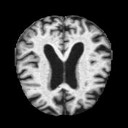

In [83]:
img

In [84]:
tableau_pixels= np.asarray(img)
tableau_pixels= tableau_pixels.reshape((1,128,128,1))
tableau_pixels.shape

(1, 128, 128, 1)

In [85]:
y_pred= model.predict(tableau_pixels)
etiq= np.argmax(y_pred, axis=1)

if (etiq[0]==0):
    print("Prédiction: Mild-demented")
    
if (etiq[0]==1):
    print("Prédiction: Non-demented")
    
if(etiq[0]==2):
    print("Prédiction: Very Mild demented")


1/1 [==============================] - 0s 28ms/step
Prédiction: Mild-demented


In [86]:
filename_bis= "Desktop/Dataset/Non_Demented/non_1.jpg"
img_bis= Image.open(filename_bis)

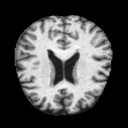

In [87]:
img_bis

In [88]:
tableau_pixels= np.asarray(img_bis)
tableau_pixels= tableau_pixels.reshape((1,128,128,1))
tableau_pixels.shape

(1, 128, 128, 1)

In [89]:
y_pred= model.predict(tableau_pixels)
etiq= np.argmax(y_pred, axis=1)

if (etiq[0]==0):
    print("Prédiction: Mild-demented")
    
if (etiq[0]==1):
    print("Prédiction: Non-demented")
    
if(etiq[0]==2):
    print("Prédiction: Very Mild demented")

1/1 [==============================] - 0s 27ms/step
Prédiction: Non-demented
